<a href="https://colab.research.google.com/github/AdrianP03/ST1Capstone/blob/main/ST1Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ST1/ST1G Assignment 9 (Capstone Programming Project)**


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
%cd /content/drive/MyDrive/ST1Capstone/

/content/drive/MyDrive/ST1Capstone


In [40]:
!ls

Netflix_Data.csv


### This capstone project is based on the Netflix Stock Price Prediction using Time Series. The data is available from the Kaggle repository: (https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction/data).




*   It contains the details of Netflix stock prices over 5 years.
*   My project task is to create a machine learning model which can predict the closing stock price based on its characteristics.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.


### Step 1: Reading the data Reading the data with python

In [41]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Reading the dataset
import pandas as pd
import numpy as np
Netflix_Data = pd.read_csv('/content/drive/MyDrive/ST1Capstone/Netflix_Data.csv', encoding='latin')
print('Shape before deleting duplicate values:', Netflix_Data.shape)

# Removing duplicate rows if any
Netflix_Data=Netflix_Data.drop_duplicates()
print('Shape After deleting duplicate values:', Netflix_Data.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
Netflix_Data.head(10)


Shape before deleting duplicate values: (1009, 7)
Shape After deleting duplicate values: (1009, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


## Key observations from Step 1 about the Data Description


*   This file contains 1009 days worth of stock data.
*   There are 7 attributes and they are outlined below.



*   **Date** - Date of the stock
*   **Open** - Price at which the stock opened
*   **High** - Highest point of stock price
*   **Low** - Lowest point of stock price
*   **Close** - Close price adjusted for splits
*   **Adj Close** - Adjusted close price adjusted for splits and dividend and/or capital gain distributions.
*   **Volume** - Volume of stocks




# Step 2 : Problem Statement Definition
* Developing a predictive model to forecast the closing price of Netflix stock.
* **Target Variable:** Close price (Close)
* **Predictors/Features:** Date, Open, High, Low, Volume, Adj Close

This task has been chosen to help understand stock price trends and make informed investments in Netflix.

## Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.
* Based on the problem statement we need to create a supervised machine learning regression model, as the target variable (Close price) is **Continuous**.

* This will use historical stock price data to train a model that can estimate future values based on patterns observed in the data.


# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed)
* Before proceeding with the predictive modeling, it is important to examine the distribution of the target variable, which is the Close price of Netflix stock, to determine if the data is balanced or skewed.
* An ideally balanced distribution resembles a bell curve, although slight positive or negative skewness can also be acceptable.
* The distribution's shape significantly impacts the performance of regression algorithms by influencing the model's ability to learn from the data comprehensively.
* We need to ensure that the histogram of the Close price displays characteristics of a bell curve or a slight skew to avoid potential biases or issues in the predictive model.

<Axes: >

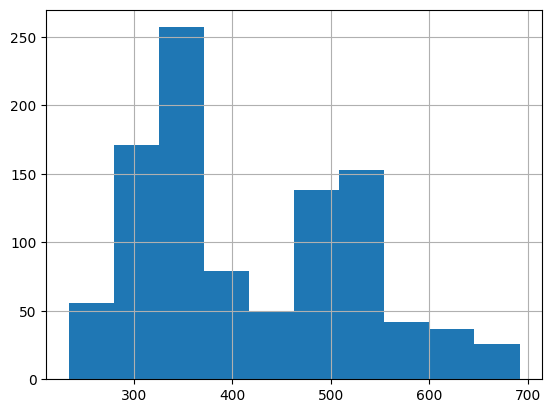

In [52]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the close values
Netflix_Data['Close'].hist()

* **Vertical Axis:** Number of days
* **Horizontal Axis:** Close price